In [206]:
import pandas as pd
import numpy as np

In [207]:
df = pd.read_csv('rutes_outdoor_espanya_catalunya.csv', encoding='latin-1', decimal=',')
df.head()

,TypeTrack,TrailTrack,UserRank,Distància,Loop,Desnivell acumulat pujant,Altitud màx,Desnivell acumulat baixant,Altitud mín,Dificultat tècnica:,...,Lake,Fountain,Panoramic,River,CarPark,Bridge,WaterFall,Refuge,Shelter,Url
0,Senderisme,88,121.601,"15,37 quilòmetres",Sí,854 metres,2.033 metres,854 metres,1.592 metres,Moderat,...,Si,Si,No,No,No,No,No,No,Si,https://ca.wikiloc.com/rutes-senderisme/130827...
1,Senderisme,86,66.994,"11,99 quilòmetres",Sí,713 metres,1.992 metres,713 metres,1.341 metres,Moderat,...,No,No,No,Si,Si,No,No,No,No,https://ca.wikiloc.com/rutes-senderisme/el-pui...
2,Senderisme,77,23.218,"11,31 quilòmetres",Sí,510 metres,1.898 metres,510 metres,1.407 metres,Fàcil,...,No,Si,No,No,No,No,No,No,Si,https://ca.wikiloc.com/rutes-senderisme/sant-m...
3,Senderisme,77,23.218,"8,88 quilòmetres",No,569 metres,2.065 metres,619 metres,1.456 metres,Fàcil,...,No,Si,No,No,No,No,No,No,Si,https://ca.wikiloc.com/rutes-senderisme/sant-m...
4,Senderisme,75,9.968,"9,07 quilòmetres",Sí,614 metres,1.952 metres,614 metres,1.353 metres,Fàcil,...,No,Si,No,No,No,No,No,Si,No,https://ca.wikiloc.com/rutes-senderisme/puig-e...


In [208]:
#Eliminem caràcters string de les variables
df['Distancia'] = df['Distància'].str.replace("[^0-9.,]", '')
df['Distancia'] = df['Distancia'].str.replace(",", '.')
df['Distancia'] = df['Distancia'].astype(float)
df['Desn_acum_pujant (m)'] = pd.to_numeric(df['Desnivell acumulat pujant'].str.replace("[^0-9.]", ''))
df.pop("Desnivell acumulat pujant")
df['Desn_acum_baix (m)'] = pd.to_numeric(df['Desnivell acumulat baixant'].str.replace("[^0-9.]", ''))
df.pop("Desnivell acumulat baixant")
df['Altitud max (m)'] = pd.to_numeric(df['Altitud màx'].str.replace("[^0-9.]", ''))
df.pop("Altitud màx")
df['Altitud min (m)'] = pd.to_numeric(df['Altitud mín'].str.replace("[^0-9.]", ''))
df.pop("Altitud mín")

C:\Users\moyap\AppData\Local\Temp/ipykernel_1136/1950819392.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Distancia'] = df['Distància'].str.replace("[^0-9.,]", '')
C:\Users\moyap\AppData\Local\Temp/ipykernel_1136/1950819392.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Desn_acum_pujant (m)'] = pd.to_numeric(df['Desnivell acumulat pujant'].str.replace("[^0-9.]", ''))
C:\Users\moyap\AppData\Local\Temp/ipykernel_1136/1950819392.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Desn_acum_baix (m)'] = pd.to_numeric(df['Desnivell acumulat baixant'].str.replace("[^0-9.]", ''))
C:\Users\moyap\AppData\Local\Temp/ipykernel_1136/1950819392.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Altitud max (m)'] = pd.to_numeric(df['Altitud màx'].str.replace("[^0-9.]", ''))
C

0        1.592 metres
1        1.341 metres
2        1.407 metres
3        1.456 metres
4        1.353 metres
             ...     
60052       49 metres
60053       38 metres
60054       69 metres
60055       54 metres
60056      157 metres
Name: Altitud mín, Length: 60057, dtype: object

In [209]:
#Estandaritzem variàble Data:
df['Data de realització'] = df['Data de realització'].str.replace("gener ", "1/")
df['Data de realització'] = df['Data de realització'].str.replace("febrer ", "2/")
df['Data de realització'] = df['Data de realització'].str.replace("març ", "3/")
df['Data de realització'] = df['Data de realització'].str.replace("abril ", "4/")
df['Data de realització'] = df['Data de realització'].str.replace("maig ", "5/")
df['Data de realització'] = df['Data de realització'].str.replace("juny ", "6/")
df['Data de realització'] = df['Data de realització'].str.replace("juliol ", "7/")
df['Data de realització'] = df['Data de realització'].str.replace("agost ", "8/")
df['Data de realització'] = df['Data de realització'].str.replace("setembre ", "9/")
df['Data de realització'] = df['Data de realització'].str.replace("octubre ", "10/")
df['Data de realització'] = df['Data de realització'].str.replace("novembre ", "11/")
df['Data de realització'] = df['Data de realització'].str.replace("desembre ", "12/")
df['Data de realització'] = df['Data de realització'].str.replace("d", "")
df['Data de realització'] = df['Data de realització'].str.replace("e", "")
df[['Mes','Any']] = df['Data de realització'].str.split("/",expand=True,)
df['Data de realització'] = df['Data de realització'].str.strip()
df.dropna(subset = ["Any"], inplace=True)
df['Any'] = df['Any'].astype(int)
df.pop("Data de realització")

0        8/2013
1         6/2017
2         1/2020
3         3/2014
4        11/2016
          ...   
60052     1/2007
60053     5/2020
60054    4/2011
60055    11/2013
60056     9/2012
Name: Data de realització, Length: 58358, dtype: object

In [210]:
#Passem valoració a integer
df['Valoració'] = pd.to_numeric(df['Valoració'].str.replace(" de 5", ""))

In [211]:
df.head()

,TypeTrack,TrailTrack,UserRank,Distància,Loop,Dificultat tècnica:,Valoració,vots,Lake,Fountain,...,Refuge,Shelter,Url,Distancia,Desn_acum_pujant (m),Desn_acum_baix (m),Altitud max (m),Altitud min (m),Mes,Any
0,Senderisme,88,121.601,"15,37 quilòmetres",Sí,Moderat,4.33,3.0,Si,Si,...,No,Si,https://ca.wikiloc.com/rutes-senderisme/130827...,15.37,854.0,854.0,2.033,1.592,8,2013
1,Senderisme,86,66.994,"11,99 quilòmetres",Sí,Moderat,4.67,3.0,No,No,...,No,No,https://ca.wikiloc.com/rutes-senderisme/el-pui...,11.99,713.0,713.0,1.992,1.341,6,2017
2,Senderisme,77,23.218,"11,31 quilòmetres",Sí,Fàcil,5.00,1.0,No,Si,...,No,Si,https://ca.wikiloc.com/rutes-senderisme/sant-m...,11.31,510.0,510.0,1.898,1.407,1,2020
3,Senderisme,77,23.218,"8,88 quilòmetres",No,Fàcil,4.67,2.0,No,Si,...,No,Si,https://ca.wikiloc.com/rutes-senderisme/sant-m...,8.88,569.0,619.0,2.065,1.456,3,2014
4,Senderisme,75,9.968,"9,07 quilòmetres",Sí,Fàcil,4.67,1.0,No,Si,...,Si,No,https://ca.wikiloc.com/rutes-senderisme/puig-e...,9.07,614.0,614.0,1.952,1.353,11,2016


In [212]:
df.describe(include='all')

,TypeTrack,TrailTrack,UserRank,Distància,Loop,Dificultat tècnica:,Valoració,vots,Lake,Fountain,...,Refuge,Shelter,Url,Distancia,Desn_acum_pujant (m),Desn_acum_baix (m),Altitud max (m),Altitud min (m),Mes,Any
count,58358,58358.000000,58358,58358,58358,58358,58335.000000,58335.000000,33314,33314,...,33314,33314,58358,58358.000000,58358.000000,58358.000000,58358.000000,58358.000000,58358,58358.000000
unique,60,NaN,3308,9652,2,6,NaN,NaN,2,2,...,2,2,58358,NaN,NaN,NaN,NaN,NaN,12,NaN
top,Senderisme,NaN,105.890,"9,96 quilòmetres",Sí,Moderat,NaN,NaN,No,No,...,No,No,https://ca.wikiloc.com/rutes-senderisme/130827...,NaN,NaN,NaN,NaN,NaN,8,NaN
freq,30129,NaN,1217,50,45561,33616,NaN,NaN,30893,25416,...,31068,32474,1,NaN,NaN,NaN,NaN,NaN,5641,NaN
mean,NaN,42.419171,NaN,NaN,NaN,NaN,4.416787,1.397617,NaN,NaN,...,NaN,NaN,NaN,27.311936,370.836424,368.929552,350.299549,245.123240,NaN,2015.640683
std,NaN,21.721364,NaN,NaN,NaN,NaN,0.710170,1.277358,NaN,NaN,...,NaN,NaN,NaN,39.711380,297.439524,297.193565,311.675709,265.698491,NaN,2.894062
min,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,0.050000,0.000000,0.000000,0.000000,0.000000,NaN,2000.000000
25%,NaN,25.000000,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,9.840000,80.000000,74.000000,2.492000,16.000000,NaN,2014.000000
50%,NaN,40.000000,NaN,NaN,NaN,NaN,4.670000,1.000000,NaN,NaN,...,NaN,NaN,NaN,15.350000,349.000000,348.000000,326.000000,144.000000,NaN,2016.000000
75%,NaN,59.000000,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,33.897500,603.000000,602.000000,592.000000,418.000000,NaN,2018.000000


In [213]:
df['Dificultat'] = df['Dificultat tècnica:'].str.replace("Fàcil", "0")
df['Dificultat'] = df['Dificultat tècnica:'].str.replace("No aplicable", "0")
df['Dificultat'] = df['Dificultat tècnica:'].str.replace("Moderat", "1")
df['Dificultat'] = df['Dificultat tècnica:'].str.replace("Difícil", "2")
df['Dificultat'] = df['Dificultat tècnica:'].str.replace("Molt difícil", "3")
df['Dificultat'] = df['Dificultat tècnica:'].str.replace("Només experts", "4")

In [214]:
df.head()

,TypeTrack,TrailTrack,UserRank,Distància,Loop,Dificultat tècnica:,Valoració,vots,Lake,Fountain,...,Shelter,Url,Distancia,Desn_acum_pujant (m),Desn_acum_baix (m),Altitud max (m),Altitud min (m),Mes,Any,Dificultat
0,Senderisme,88,121.601,"15,37 quilòmetres",Sí,Moderat,4.33,3.0,Si,Si,...,Si,https://ca.wikiloc.com/rutes-senderisme/130827...,15.37,854.0,854.0,2.033,1.592,8,2013,Moderat
1,Senderisme,86,66.994,"11,99 quilòmetres",Sí,Moderat,4.67,3.0,No,No,...,No,https://ca.wikiloc.com/rutes-senderisme/el-pui...,11.99,713.0,713.0,1.992,1.341,6,2017,Moderat
2,Senderisme,77,23.218,"11,31 quilòmetres",Sí,Fàcil,5.00,1.0,No,Si,...,Si,https://ca.wikiloc.com/rutes-senderisme/sant-m...,11.31,510.0,510.0,1.898,1.407,1,2020,Fàcil
3,Senderisme,77,23.218,"8,88 quilòmetres",No,Fàcil,4.67,2.0,No,Si,...,Si,https://ca.wikiloc.com/rutes-senderisme/sant-m...,8.88,569.0,619.0,2.065,1.456,3,2014,Fàcil
4,Senderisme,75,9.968,"9,07 quilòmetres",Sí,Fàcil,4.67,1.0,No,Si,...,No,https://ca.wikiloc.com/rutes-senderisme/puig-e...,9.07,614.0,614.0,1.952,1.353,11,2016,Fàcil


In [215]:
df1 = df[(df.Any <2005) & (df.TypeTrack == 'Senderisme')]
df2 = df[(df.Any >=2005) & (df.Any < 2010) & (df.TypeTrack == 'Senderisme')]
df3 = df[(df.Any >=2010) & (df.Any < 2015) & (df.TypeTrack == 'Senderisme')]
df4 = df[(df.Any >=2015) & (df.Any < 2020) & (df.TypeTrack == 'Senderisme')]

In [216]:
df[(df.TypeTrack == 'Senderisme')].describe(include='all')

,TypeTrack,TrailTrack,UserRank,Distància,Loop,Dificultat tècnica:,Valoració,vots,Lake,Fountain,...,Shelter,Url,Distancia,Desn_acum_pujant (m),Desn_acum_baix (m),Altitud max (m),Altitud min (m),Mes,Any,Dificultat
count,30129,30129.000000,30129,30129,30129,30129,30120.000000,30120.000000,22089,22089,...,22089,30129,30129.000000,30129.00000,30129.000000,30129.000000,30129.000000,30129,30129.000000,30129
unique,1,NaN,2662,3200,2,6,NaN,NaN,2,2,...,2,30129,NaN,NaN,NaN,NaN,NaN,12,NaN,6
top,Senderisme,NaN,121.601,"8,62 quilòmetres",Sí,Moderat,NaN,NaN,No,No,...,No,https://ca.wikiloc.com/rutes-senderisme/130827...,NaN,NaN,NaN,NaN,NaN,5,NaN,Moderat
freq,30129,NaN,457,39,25119,16277,NaN,NaN,20381,16217,...,21439,1,NaN,NaN,NaN,NaN,NaN,2898,NaN,16277
mean,NaN,47.266919,NaN,NaN,NaN,NaN,4.420543,1.497012,NaN,NaN,...,NaN,NaN,12.634628,395.32648,392.852123,338.334529,303.583873,NaN,2015.932656,NaN
std,NaN,21.374153,NaN,NaN,NaN,NaN,0.678341,1.520162,NaN,NaN,...,NaN,NaN,11.050984,263.44856,263.614425,331.747217,284.761975,NaN,2.846490,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,...,NaN,NaN,0.050000,0.00000,0.000000,0.000000,0.000000,NaN,2000.000000,NaN
25%,NaN,31.000000,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,...,NaN,NaN,8.270000,190.00000,186.000000,1.846000,29.000000,NaN,2014.000000,NaN
50%,NaN,46.000000,NaN,NaN,NaN,NaN,4.670000,1.000000,NaN,NaN,...,NaN,NaN,11.330000,377.00000,376.000000,286.000000,233.000000,NaN,2016.000000,NaN
75%,NaN,64.000000,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,...,NaN,NaN,14.960000,587.00000,584.000000,622.000000,516.000000,NaN,2018.000000,NaN


In [217]:
df1['Dificultat tècnica:'].value_counts()

Moderat    9
Fàcil      8
Difícil    2
Name: Dificultat tècnica:, dtype: int64

In [218]:
df2['Dificultat tècnica:'].value_counts()

Fàcil           328
Moderat         301
Difícil          35
Molt difícil      2
Name: Dificultat tècnica:, dtype: int64

In [219]:
df3['Dificultat tècnica:'].value_counts()

Moderat          4103
Fàcil            3599
Difícil           436
Molt difícil       22
Només experts       1
Name: Dificultat tècnica:, dtype: int64

In [220]:
df4['Dificultat tècnica:'].value_counts()

Moderat          10482
Fàcil             7636
Difícil            711
Molt difícil        47
Només experts        4
No aplicable         1
Name: Dificultat tècnica:, dtype: int64

In [259]:
df['Dificultat tècnica:'].value_counts()

Moderat          33616
Fàcil            18507
Difícil           5341
Molt difícil       740
Només experts      153
No aplicable         1
Name: Dificultat tècnica:, dtype: int64

<AxesSubplot:xlabel='Distancia', ylabel='Count'>

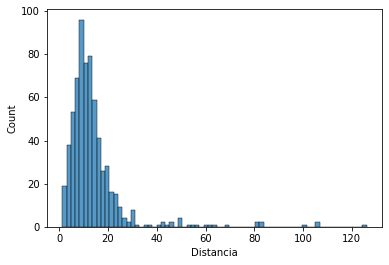

In [231]:
import seaborn as sns
%matplotlib inline

sns.histplot(data=df2, x='Distancia', stat='count')

In [263]:
df1 = df[(df.Any <2005) & (df.TypeTrack == 'Senderisme')]
df2 = df[(df.Any >=2005) & (df.Any < 2010) & (df.TypeTrack == 'Senderisme')]
df3 = df[(df.Any >=2010) & (df.Any < 2015) & (df.TypeTrack == 'Senderisme')]
df4 = df[(df.Any >=2015) & (df.Any < 2020) & (df.TypeTrack == 'Senderisme')]
df1 = df1[['Distancia']]
df2 = df2[['Distancia']]
df3 = df3[['Distancia']]
df4 = df4[['Distancia']]
df0 = df[(df.TypeTrack == 'Senderisme')]
df0 = df0[['Distancia']]
df0.head()

,Distancia
0,15.37
1,11.99
2,11.31
3,8.88
4,9.07


In [264]:
print(df0[(df0.Distancia < 10)].count())
print(df0[(df0.Distancia >= 10) & (df0.Distancia < 20)].count())
print(df0[(df0.Distancia >= 20) & (df0.Distancia < 30)].count())
print(df0[(df0.Distancia >= 30) & (df0.Distancia < 40)].count())
print(df0[(df0.Distancia >= 40) & (df0.Distancia < 50)].count())
print(df0[(df0.Distancia >= 50)].count())

Distancia    11728
dtype: int64
Distancia    15788
dtype: int64
Distancia    2018
dtype: int64
Distancia    233
dtype: int64
Distancia    127
dtype: int64
Distancia    235
dtype: int64


In [255]:
print(df1[(df1.Distancia < 10)].count())
print(df1[(df1.Distancia >= 10) & (df1.Distancia < 20)].count())
print(df1[(df1.Distancia >= 20) & (df1.Distancia < 30)].count())
print(df1[(df1.Distancia >= 30) & (df1.Distancia < 40)].count())
print(df1[(df1.Distancia >= 40) & (df1.Distancia < 50)].count())
print(df1[(df1.Distancia >= 50)].count())

Distancia    7
dtype: int64
Distancia    8
dtype: int64
Distancia    3
dtype: int64
Distancia    1
dtype: int64
Distancia    0
dtype: int64
Distancia    0
dtype: int64


In [256]:
print(df2[(df2.Distancia < 10)].count())
print(df2[(df2.Distancia >= 10) & (df2.Distancia < 20)].count())
print(df2[(df2.Distancia >= 20) & (df2.Distancia < 30)].count())
print(df2[(df2.Distancia >= 30) & (df2.Distancia < 40)].count())
print(df2[(df2.Distancia >= 40) & (df2.Distancia < 50)].count())
print(df2[(df2.Distancia >= 50)].count())

Distancia    273
dtype: int64
Distancia    304
dtype: int64
Distancia    55
dtype: int64
Distancia    9
dtype: int64
Distancia    7
dtype: int64
Distancia    18
dtype: int64


In [257]:
print(df3[(df3.Distancia < 10)].count())
print(df3[(df3.Distancia >= 10) & (df3.Distancia < 20)].count())
print(df3[(df3.Distancia >= 20) & (df3.Distancia < 30)].count())
print(df3[(df3.Distancia >= 30) & (df3.Distancia < 40)].count())
print(df3[(df3.Distancia >= 40) & (df3.Distancia < 50)].count())
print(df3[(df3.Distancia >= 50)].count())

Distancia    2852
dtype: int64
Distancia    4395
dtype: int64
Distancia    689
dtype: int64
Distancia    84
dtype: int64
Distancia    49
dtype: int64
Distancia    92
dtype: int64


In [258]:
print(df4[(df4.Distancia < 10)].count())
print(df4[(df4.Distancia >= 10) & (df4.Distancia < 20)].count())
print(df4[(df4.Distancia >= 20) & (df4.Distancia < 30)].count())
print(df4[(df4.Distancia >= 30) & (df4.Distancia < 40)].count())
print(df4[(df4.Distancia >= 40) & (df4.Distancia < 50)].count())
print(df4[(df4.Distancia >= 50)].count())

Distancia    7633
dtype: int64
Distancia    9824
dtype: int64
Distancia    1120
dtype: int64
Distancia    116
dtype: int64
Distancia    67
dtype: int64
Distancia    121
dtype: int64
